In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Permutación y muestreo Aleatorio

In [2]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5,7)))

In [3]:
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


La permutación (reordenación aleatoria) de una serie o de las filas de un dataframe es posible utilizando la función **numpy.random.permutation**.


In [15]:
sampler = np.random.permutation(5)

In [16]:
sampler

array([3, 4, 1, 2, 0])

Este array se utiliza después en indexación basada en la función equivalente take:

In [17]:
df.take(sampler)

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6


In [18]:
df.iloc[sampler]

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6


Tomando *take* con axis='columns' podemos también seleccionar una permutación de las columnas:

In [19]:
column_sampler = np.random.permutation(7)

In [20]:
column_sampler

array([2, 5, 0, 1, 3, 4, 6])

In [21]:
df.take(column_sampler, axis='columns')

,2,5,0,1,3,4,6
0,2,5,0,1,3,4,6
1,9,12,7,8,10,11,13
2,16,19,14,15,17,18,20
3,23,26,21,22,24,25,27
4,30,33,28,29,31,32,34


Para seleccionar un subconjunto aleatorio sin reemplazo (la misma fila no puede aparecer dos veces), podemos utilizar el método sample con
objetos Series y DataFrame:

In [25]:
df.sample(n=4)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27
2,14,15,16,17,18,19,20


# Variables dummy o indicadoras

Estas variables toman dos valores usualmente, cero y uno. Los dos valores significan que la obervación pertenece a una de dos categorias. Las variables dummy o indicadoras sirven para identificar categorias o clase a las que pertenecen las observaciones.

Si una columna de un dataframe tiene k valores
distintos, se podría derivar una matriz o un dataframe con k columnas conteniendo unos y ceros. En pandas tenemos una función
pandas.get_dummies para hacer esto

In [26]:
c2 = pd.read_csv('corredores.csv', nrows=15, usecols=['Pais','Corredor'])

In [27]:
c2

,Pais,Corredor
0,GBR,3475
1,NY,13594
2,FRA,12012
3,MI,10236
4,NY,9476
5,NJ,1720
6,CA,15736
7,GBR,10580
8,NED,11957
9,B.C,18933


In [28]:
pd.get_dummies(c2['Pais'], dtype=int)

,B.C,CA,FRA,GBR,GER,ITA,MI,NED,NJ,NY
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0


In [29]:
pd.get_dummies(c2['Pais'], dtype=int).sum()

B.C    1
CA     1
FRA    1
GBR    3
GER    1
ITA    1
MI     1
NED    1
NJ     1
NY     4
dtype: int64

In [31]:
movies = pd.read_csv('movies.csv')

In [32]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Pandas ha implementado el método especial **str.get_dummies** que maneja la situación de varias membresías de grupo codificadas como una cadena de texto delimitada.

In [34]:
dummies = movies['genres'].str.get_dummies('|')

In [35]:
dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
dummies.sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [38]:
mov = pd.DataFrame({'cantidad':dummies.sum()})
mov

,cantidad
(no genres listed),34
Action,1828
Adventure,1263
Animation,611
Children,664
Comedy,3756
Crime,1199
Documentary,440
Drama,4361
Fantasy,779


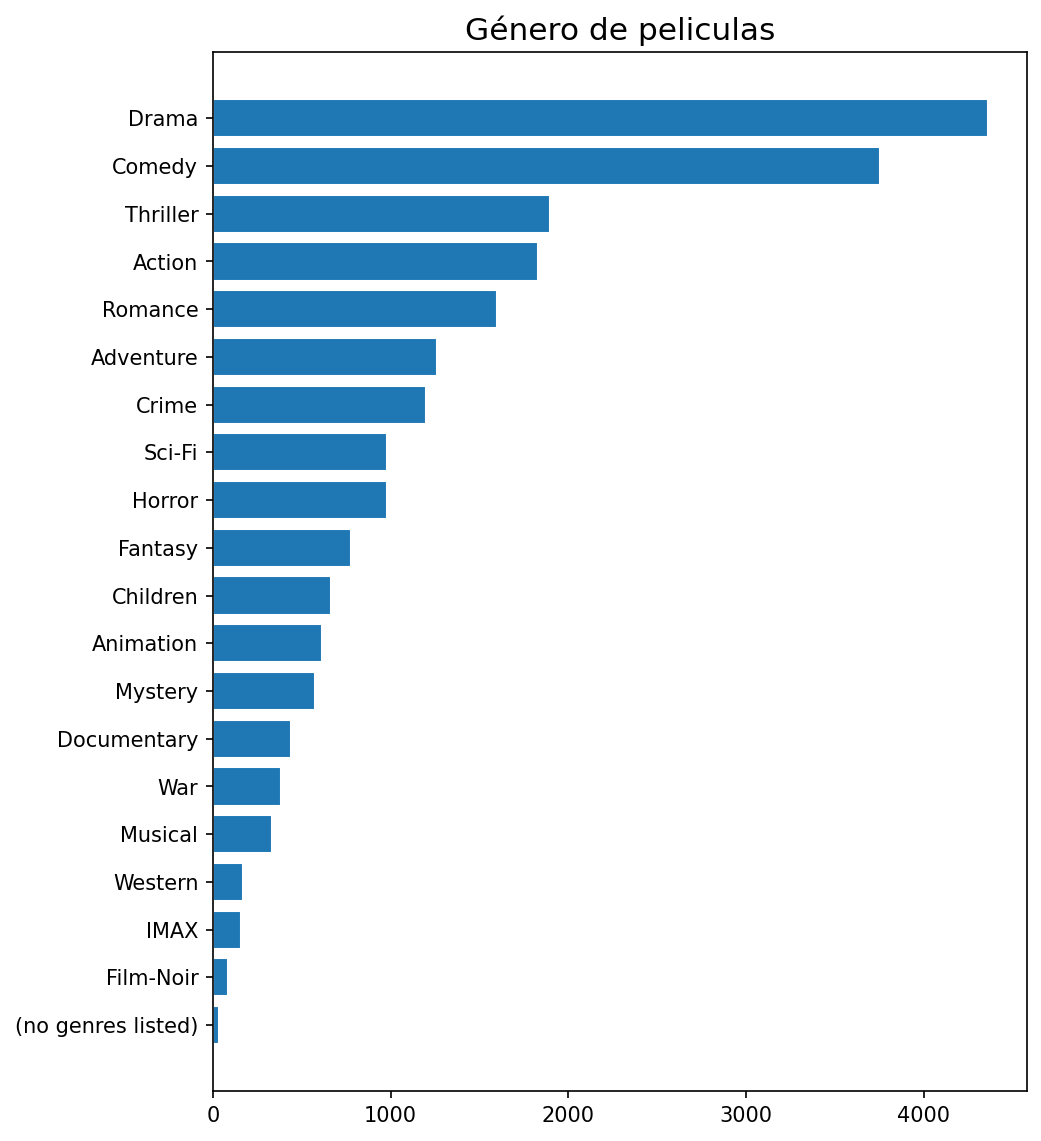

In [39]:
plt.figure(figsize=(7,9), dpi=150)
mov = mov.sort_values(by=['cantidad'])

plt.barh(mov.index, mov['cantidad'], edgecolor='white')
plt.title('Género de peliculas', fontsize = 15)
plt.show()

Después, podemos combinar esto con movies añadiendo 
delante un “Genre_” a los nombres de columna 
del dataframe dummies con el método **add_prefix**:

In [40]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))

In [41]:
movies_windic

,movieId,title,genres,Genre_(no genres listed),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Crime,...,Genre_Film-Noir,Genre_Horror,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
movies_windic.iloc[7]

movieId                                       8
title                       Tom and Huck (1995)
genres                       Adventure|Children
Genre_(no genres listed)                      0
Genre_Action                                  0
Genre_Adventure                               1
Genre_Animation                               0
Genre_Children                                1
Genre_Comedy                                  0
Genre_Crime                                   0
Genre_Documentary                             0
Genre_Drama                                   0
Genre_Fantasy                                 0
Genre_Film-Noir                               0
Genre_Horror                                  0
Genre_IMAX                                    0
Genre_Musical                                 0
Genre_Mystery                                 0
Genre_Romance                                 0
Genre_Sci-Fi                                  0
Genre_Thriller                          

# Cambiar tipos de datos 

In [46]:
df = pd.DataFrame({'A': [1, 2, None, 4],
                    'B': ['one', 'two', 'three', None],
                    'C': [False, None, False, True]})

In [47]:
df

,A,B,C
0,1.0,one,False
1,2.0,two,None
2,NaN,three,False
3,4.0,None,True


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       3 non-null      object 
 2   C       3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


In [49]:
df['A'] = df['A'].astype('Int64')
df['B'] = df['B'].astype('string')
df['C'] = df['C'].astype('boolean')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      Int64  
 1   B       3 non-null      string 
 2   C       3 non-null      boolean
dtypes: Int64(1), boolean(1), string(1)
memory usage: 208.0 bytes


# Manipulación de cadenas de texto

Una cadena de texto separada por comas se puede dividir en partes con **split**:

In [51]:
val = 'a,b, casa, banco '

In [52]:
val.split(',')

['a', 'b', ' casa', ' banco ']

split suele combinarse con **strip** para quitar los espacios en blanco (incluyendo los saltos de línea):


In [54]:
piezas = [x.strip() for x in val.split(',')]

In [55]:
piezas

['a', 'b', 'casa', 'banco']

Una forma de concatenar con el signo de dos puntos como delimitador es pasar una lista o tupla al método join en la
cadena de texto '::'

In [56]:
'::'.join(piezas)

'a::b::casa::banco'

**count** devuelve el número de apariciones de una subcadena de
texto en particular:

In [57]:
val.count(',')

3

**replace** sustituirá las apariciones de un patrón por otro.

In [58]:
val.replace(',', '::')

'a::b:: casa:: banco '

In [59]:
val.replace(',', '')

'ab casa banco '

### Expresiones regulares 

Las expresiones regulares, también conocidas como **regex**, podemos definirlas como patrones de textos a través de los cuales podemos establecer la estructura que debe poser una cadena de texto.

Las expresiones regulares ofrecen una manera flexible de buscar en un texto patrones de cadenas de texto o encontrar coincidencias.

In [60]:
import re

texto = 'tasa bar\t banco \tpez'

El regex que describe uno o más caracteres de espacio en blanco es \s+:

In [65]:
re.split(r'\s+', texto)

['tasa', 'bar', 'banco', 'pez']

Uno mismo puede compilar el regex con re.compile, formando un objeto regex reutilizable:

In [66]:
regex = re.compile(r'\s+')

In [67]:
regex.split(texto)

['tasa', 'bar', 'banco', 'pez']

Para obtener una lista de todos los patrones que coinciden con el regex, podemos usar el método **findall**:

In [68]:
regex.findall(texto)

[' ', '\t ', ' \t']

*Ejemplo:* Veamos un bloque de texto y una expresión regular capaz de identificar la mayoría de las direcciones de correo electrónico:

In [69]:
texto = '''Dave dave@google.com Steve steve@gmail.com Rob rob@gmail.com Ryan ryan@yahoo.com'''

In [70]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [72]:
regex = re.compile(pattern, flags=re.IGNORECASE)
# re.IGNORECASE hace que regex no reconozca las mayúsculas

In [73]:
regex.findall(texto)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

Supongamos que queremos encontrar direcciones de correo electrónico y dividir simultáneamente cada dirección en sus tres componentes: nombre de usuario, nombre de dominio y sufijo de dominio. Para ello, ponemos paréntesis alrededor de las partes del patrón a segmentar:

In [74]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [75]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [76]:
regex.findall(texto)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

**sub** tiene acceso también a grupos en cada coincidencia utilizando símbolos especiales como \1 y \2. El símbolo \1 corresponde al primer grupo localizado, \2 corresponde con el segundo, y así sucesivamente:

In [77]:
print(regex.sub(r'Usuario: \1 , Dominio: \2, Sufijo: \3 \n', texto))

Dave Usuario: dave , Dominio: google, Sufijo: com 
 Steve Usuario: steve , Dominio: gmail, Sufijo: com 
 Rob Usuario: rob , Dominio: gmail, Sufijo: com 
 Ryan Usuario: ryan , Dominio: yahoo, Sufijo: com 



In [80]:
lista = pd.read_csv('lista_uami.txt', sep='\t')
lista

,TRIMESTRE,UEA,GRUPO,CUPO,INSCRITOS,TIPO DE EVALUACION
0,23O,2132037,CI51,24,24,221238050.0
1,NaN,NaN,TEMAS SELECTOS DE LA MATEMATICA CONTEMPORANEA I,NaN,NaN,NaN
2,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,NaN
3,NaN,16:00 - 18:00,NaN,NaN,NaN,NaN
4,AT105,NaN,16:00 - 18:00,NaN,NaN,NaN
5,AT105,16:00 - 18:00,NaN,NaN,NaN,NaN
6,AT105,NaN,NaN,NaN,NaN,NaN
7,PROFESOR,NOMBRE,PARTICIPACION,NaN,NaN,NaN
8,370,MARTINEZ CADENA JUAN ALBERTO,NaN,NaN,NaN,NaN
9,RENGLON,MATRICULA,NOMBRE,CORREO ELECTRÓNICO,NaN,NaN


In [81]:
lista = pd.read_csv('lista_uami.txt', sep='\t',skiprows=11)

lista

,RENGLON,MATRICULA,NOMBRE,CORREO ELECTRÓNICO
0,1,330784,ANDRADE ORLOFF ATILA ESTEBAN atillov@gmail.com,NaN
1,2,730488,BUENDIA BUENDIA MARIA PAULA paulaendia90@gmail...,NaN
2,3,830531,CANO SAUCEDO JOSE MANUEL dax1155@gmail.com,NaN
3,4,30077,CASTILLO ALVARADO LESLIE KAREN karenalvarado17...,NaN
4,5,30901,CRUZ GUTIERREZ MARIANA mariana05ruzgtz@gmail.com,NaN
5,6,30808,ESTRADA RODRIGUEZ HUGO hugrod@gmail.com,NaN
6,7,530135,FALCON PEREZ ADRIAN falcoillo.af@gmail.com,NaN
7,8,30749,FLORES ANTONIO NATIVIDAD natividaantonio1b@gma...,NaN
8,9,930566,GARCIA BARRIENTOS MARIA ISABEL gisab23@hotmail...,NaN
9,10,30961,GONZALEZ HERNANDEZ ARTURO artuh2360@gmail.com,NaN


Obtener un Dataframe con el primer apellido de cada alumno

In [84]:
lista['NOMBRE'].iloc[0]

'ANDRADE ORLOFF ATILA ESTEBAN atillov@gmail.com'

In [85]:
regex = re.compile(r'\s+')

In [91]:
regex.split(lista['NOMBRE'].iloc[0])[0]

'ANDRADE'

In [92]:
L=[]

for i in range(0,24):
    L.append(regex.split(lista['NOMBRE'].iloc[i])[0])
    
pd.DataFrame({'Primer apellido':L})

,Primer apellido
0,ANDRADE
1,BUENDIA
2,CANO
3,CASTILLO
4,CRUZ
5,ESTRADA
6,FALCON
7,FLORES
8,GARCIA
9,GONZALEZ


Obtener un Dataframe con el correo electrónico de cada alumno

In [93]:
lista['NOMBRE'].iloc[0]

'ANDRADE ORLOFF ATILA ESTEBAN atillov@gmail.com'

In [94]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [96]:
regex.findall(lista['NOMBRE'].iloc[0])[0]

'atillov@gmail.com'

In [97]:
L=[]

for i in range(0,24):
    L.append(regex.findall(lista['NOMBRE'].iloc[i])[0])
    
correos=pd.DataFrame({'correo':L})
correos

,correo
0,atillov@gmail.com
1,paulaendia90@gmail.com
2,dax1155@gmail.com
3,karenalvarado17@gmail.com
4,mariana05ruzgtz@gmail.com
5,hugrod@gmail.com
6,falcoillo.af@gmail.com
7,natividaantonio1b@gmail.com
8,gisab23@hotmail.com
9,artuh2360@gmail.com


¿Cuántos utilizan correo de gmail?

In [98]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [102]:
regex.findall(lista['NOMBRE'].iloc[0])[0][1]

'gmail'

In [103]:
D=[]

for i in range(0,24):
    D.append(regex.findall(lista['NOMBRE'].iloc[i])[0][1])
    
Dom=pd.DataFrame({'dominio':D})
Dom

,dominio
0,gmail
1,gmail
2,gmail
3,gmail
4,gmail
5,gmail
6,gmail
7,gmail
8,hotmail
9,gmail


In [105]:
pd.get_dummies(Dom['dominio'], dtype=int).sum()

gmail      19
hotmail     4
yahoo       1
dtype: int64

Otro camino: Podríamos comprobar si cada dirección de correo electrónico contiene 'gmail' con str.contains:

In [106]:
datos = pd.Series(L)

In [107]:
datos.str.contains('gmail').sum()

19

Listado parcial de métodos de cadena de texto del objeto Series.

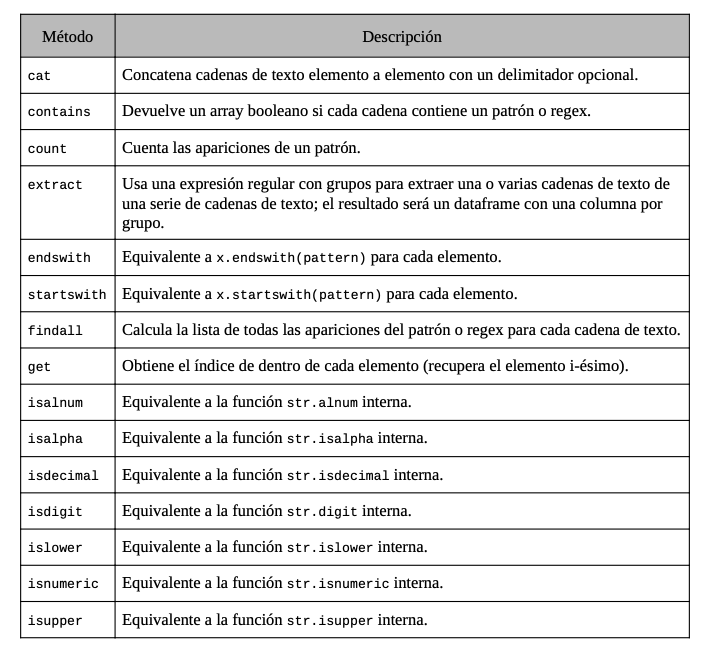

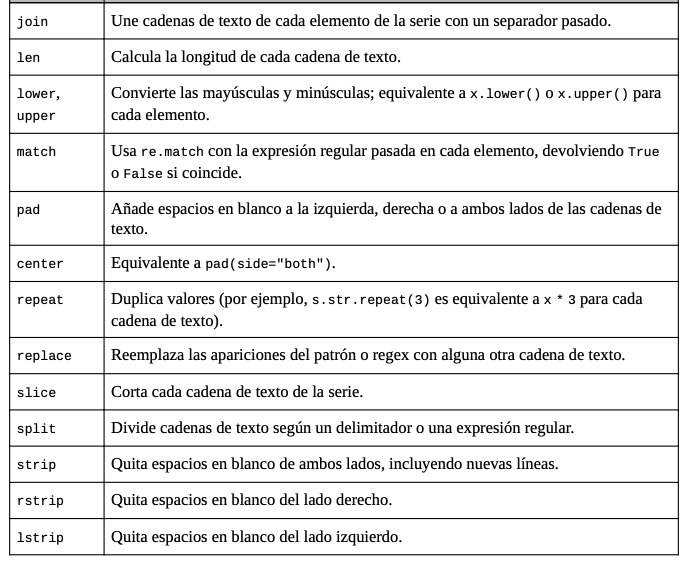